# Calorimetry likelihood stopping protons with arrays

In [1]:
%load_ext autoreload
%autoreload 2

import math
from itertools import product
import uproot
import awkward
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.stats import binned_statistic

import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from calo_likelihood import caloLikelihood
from general_functions import *
from loaders import *
from plotter import *
from categorisation import *
from initializers import *

In [2]:
# today = 'calorimetry'
today = 'paper'

In [3]:
branches = [
    'run',
    'sub',
    'evt',
    
    'backtracked_pdg',
    'backtracked_e',
    'backtracked_purity',
    'backtracked_completeness',
    'backtracked_overlay_purity',
    'backtracked_end_process',
    
    'backtracked_start_x',
    'backtracked_start_y',
    'backtracked_start_z',
    
    'backtracked_sce_start_x',
    'backtracked_sce_start_y',
    'backtracked_sce_start_z',
    
    'nplanehits_U',
    'nplanehits_V',
    'nplanehits_Y',
    'trk_score',

    'generation',
    'trk_daughters',
    'shr_daughters',

    'trk_sce_start_x',
    'trk_sce_start_y',
    'trk_sce_start_z',

    'trk_sce_end_x',
    'trk_sce_end_y',
    'trk_sce_end_z',
    
    'trk_theta',
    'trk_phi',
     
    'trk_dir_x',
    'trk_dir_y',
    'trk_dir_z',

    'trk_len',
    'trk_distance',
    'longest',
    
    'trk_mcs_muon_mom',
    'trk_range_muon_mom',
    
    'is_hit_montecarlo_u',
    'is_hit_montecarlo_v',
    'is_hit_montecarlo_y',
    
    'dqdx_u',
    'dqdx_v',
    'dqdx_y',

    'dedx_u',
    'dedx_v',
    'dedx_y',

    'rr_u',
    'rr_v',
    'rr_y',

    'pitch_u',
    'pitch_v',
    'pitch_y',
    
    'dir_x_u',
    'dir_x_v',
    'dir_x_y',
    
    'dir_y_u',
    'dir_y_v',
    'dir_y_y',
    
    'dir_z_u',
    'dir_z_v',
    'dir_z_y',
]

In [4]:
directory = '/home/nic/Desktop/MicroBooNE/calorimetry_likelihood/v07/'
pot_beam_on = 4.054e+19
n_triggers_on = 8977290.0
n_triggers_off = 33240727.0

fraction = 1.
pot_beam_on *= fraction

file_lists = {}

file_lists['beam_on'] = directory+'beam_on/out_proton_skimmed.root'
# file_lists['beam_on'] = directory+'beam_on/out.root'
file_lists['beam_off'] = directory+'beam_off/out_proton_skimmed.root'
file_lists['bnb_nu'] = directory+'bnb_nu/out_proton_skimmed.root'
file_lists['bnb_dirt'] = directory+'bnb_dirt/out_proton_skimmed.root'

folder = "nuselection"
events_tree_name = "CalorimetryAnalyzer"
pot_tree_name = "SubRun"

In [5]:
arrays, pot = load_data_calo(file_lists, 
                        branches, 
                        folder, 
                        events_tree_name, 
                        pot_tree_name, 
                        labels=['beam_on', 'beam_off', 'bnb_nu', 'bnb_dirt'],
#                         labels=['beam_on'],
                        lazy=False,
                        fraction=fraction)

start loading beam_on
start loading beam_off
start loading bnb_nu
start loading bnb_dirt
Done!


In [6]:
scale_factors = compute_scale_factors(pot, pot_beam_on, n_triggers_on, n_triggers_off)

In [7]:
scale_factors

{'beam_on': 1,
 'beam_off': 0.27006900300345416,
 'bnb_nu': 0.03504258914669898,
 'bnb_dirt': 0.12607623142910898}

In [8]:
for name, array in arrays.items():
    print(name)
    initialisation_for_caloriemtry_data_mc(array)
    compute_pid(array)

beam_on


/home/nic/Dropbox/MicroBooNE/bnb_nue_analysis/lib/general_functions.py:39: RuntimeWarning: divide by zero encountered in true_divide
  return 0.3 / cos


beam_off
bnb_nu
bnb_dirt


In [9]:
my_plotter = plotter(arrays, scale_factors, pot_beam_on, branch_weights_name='weightSplineTimesTune')

# Base plots data/MC comparison 

In [10]:
variables = [
#     'trk_len',
#     'trk_score',
#     'trk_theta',
#     'trk_phi',
    'llr_012_n'
]

binnings = {
    'trk_len': [50, 0, 600],
    'trk_score': [50, 0, 1],
    'trk_theta': [50, 0, np.pi],
    'trk_phi': [50, -np.pi, np.pi],
    'llr_012_n': [50, -1, 1],
}

xlabels = {
    'trk_len': 'Track length [cm]',
    'trk_score': r'Track score',
    'trk_theta': r'Track $\theta$',
    'trk_phi': r'Track $\phi$',
    'llr_012_n': 'Track PID',
}

log = {
    'trk_len': True,
    'trk_score': False,
    'trk_theta': False,
    'trk_phi': False,
    'llr_012_n': False,
}

In [11]:
matplotlib.rcParams.update({'font.size': 12})

/home/nic/Dropbox/MicroBooNE/bnb_nue_analysis/lib/plotter.py:185: RuntimeWarning: invalid value encountered in true_divide
  bin_relative_errors_data = beam_on_y_err / beam_on_values


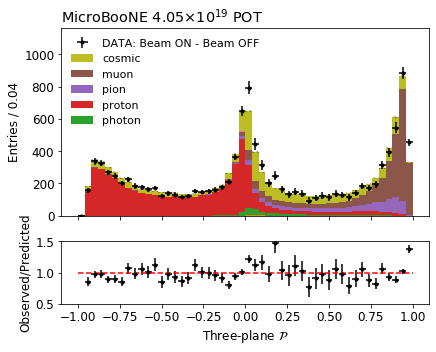

In [13]:
# !mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/protons/base_plots/
save_folder_base = '/home/nic/Dropbox/MicroBooNE/_fig/calorimetry/' + today + '/'#+ '/protons/base_plots/'

title_base = 'Trk-score > 0.5\ntrk-vtx distance < 5 cm, start-end fiducial'
title_base = None
for var in variables:
#     out = my_plotter.plot_pot_normalised_var(variable=var,
#                                    binning=binnings[var], 
#                                    categories=pdg_categories, 
#                                    additional_selection=None, 
#                                    prediction_datasets=['bnb_dirt', 'bnb_nu'],
#                                    xlabel=xlabels[var], 
#                                    title=title_base,
#                                    log=log[var], 
#                                    subtracted=False, 
#                                    onebin=False,
#                                    legend='in')
#     plt.savefig(save_folder_base + var + '_before_pid_cut_pot.png', dpi=300)
#     plt.savefig(save_folder_base + var + '_before_pid_cut_pot.pdf')
#     plt.close()
    
    
    out = my_plotter.plot_pot_normalised_var(variable=var,
                                   binning=binnings[var], 
                                   categories=pdg_categories, 
                                   additional_selection=None, 
                                   prediction_datasets=['bnb_dirt', 'bnb_nu'],
                                   xlabel=xlabels[var], 
                                   title=title_base,
                                   log=log[var], 
                                   subtracted=True, 
                                   onebin=False,
                                   area_norm=True,
                                   text_details=False,
                                   legend='in')
    ax = out[0].axes
    ax[0].set_ylim(0, ax[0].get_ylim()[1]*1.2)
    handles, labels = ax[0].get_legend_handles_labels()
    hl_to_remove = []
    for i, (h, l) in enumerate(zip(handles, labels)):
        if l in ['electron', 'neutron', 'kaon']:
            hl_to_remove.append((h, l))
        if 'DATA' in l:
            labels[i] = 'DATA: Beam ON - Beam OFF'
    for h, l in hl_to_remove:
        handles.remove(h)
        labels.remove(l)
    ax[0].legend(handles[::-1], labels[::-1], frameon=False, loc='upper left', ncol=1, fontsize=11)
    ax[1].set_ylabel('Observed/Predicted')
    ax[1].set_xlabel(r'Three-plane $\mathcal{P}$')
    plt.savefig(save_folder_base + var + '_before_pid_cut_area_norm.png', dpi=300)
    plt.savefig(save_folder_base + var + '_before_pid_cut_area_norm.pdf')
#     plt.close()

In [ ]:
def additional_selection(array):
    return array['llr_012_n'] < -0.1

binnings['trk_len'] = [50, 0, 150]

title_base = 'Trk-score > 0.5, track PID < -0.1\ntrk-vtx distance < 5 cm, start-end fiducial'
for var in variables:
    out = my_plotter.plot_pot_normalised_var(variable=var,
                                   binning=binnings[var], 
                                   categories=pdg_categories, 
                                   additional_selection=additional_selection, 
                                   prediction_datasets=['bnb_dirt', 'bnb_nu'],
                                   xlabel=xlabels[var], 
                                   title=title_base,
                                   log=False, 
                                   subtracted=False, 
                                   onebin=False)
    plt.savefig(save_folder_base + var + '_after_pid_cut_pot.png', dpi=300)
    plt.savefig(save_folder_base + var + '_after_pid_cut_pot.pdf')
    plt.close()
    
    
    out = my_plotter.plot_pot_normalised_var(variable=var,
                                   binning=binnings[var], 
                                   categories=pdg_categories, 
                                   additional_selection=additional_selection, 
                                   prediction_datasets=['bnb_dirt', 'bnb_nu'],
                                   xlabel=xlabels[var], 
                                   title=title_base,
                                   log=False, 
                                   subtracted=True, 
                                   onebin=False,
                                   area_norm=True)
    plt.savefig(save_folder_base + var + '_after_pid_cut_area_norm.png', dpi=300)
    plt.savefig(save_folder_base + var + '_after_pid_cut_area_norm.pdf')
    plt.close()

# Plots at low rr, in bins of rr and pitch

In [ ]:
this_folder = 'low_rr_before_after'
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/protons/$this_folder/plane0/
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/protons/$this_folder/plane1/
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/protons/$this_folder/plane2/
this_save_folder = '/home/nic/Dropbox/MicroBooNE/_fig/' + today + '/protons/{}/'.format(this_folder)

parameters = ['rr', 'pitch']
parameters_legend_names = ['residual range', 'pitch']
parameters_bin_edges = [[0, 2, 5, 10, 20, 30, 50, 150, 300], [0.3, 0.4, 1, 30]]
dedx_vars = 'dqdx'

binning = [60, 0, 1500]
title_base = 'Trk-score > 0.5, track PID < -0.1\ntrk-vtx distance < 5 cm, start-end fiducial'

chi2_avant = {}
chi2_depois = {}

for plane_num, plane in zip([2, 1, 0], ['_y', '_v', '_u']):
    chi2_avant[plane_num] = []
    chi2_depois[plane_num] = []
    for par0_edges in zip(parameters_bin_edges[0][:-1], parameters_bin_edges[0][1:]):
        chi2_avant[plane_num].append([])
        chi2_depois[plane_num].append([])
        for par1_edges in zip(parameters_bin_edges[1][:-1], parameters_bin_edges[1][1:]):
            this_parameters = [par+plane for par in parameters]
            def sel_function(array):
                return (array['first_last_hit_mask'+plane]) &\
                       (array['llr_012_n'] < -0.1) &\
                        ((array[this_parameters[0]]) > par0_edges[0]) &\
                        ((array[this_parameters[0]]) <= par0_edges[1]) &\
                        ((array[this_parameters[1]]) > par1_edges[0]) &\
                        ((array[this_parameters[1]]) <= par1_edges[1])
            title = title_base + '\nplane {}, {:.2f} < {} < {:.2f} & {:.2f} < {} < {:.2f}'.format(plane_num, par0_edges[0], 
                                                         parameters_legend_names[0],
                                                         par0_edges[1],
                                                         par1_edges[0], 
                                                         parameters_legend_names[1],
                                                         par1_edges[1],)
            
            save_label = '{:04.0f}_{}_{:04.0f}_{:04.1f}_{}_{:04.1f}'.format( 
                                                         par0_edges[0], 
                                                         parameters[0],
                                                         par0_edges[1],
                                                         par1_edges[0], 
                                                         parameters[1],
                                                         par1_edges[1]).replace('.', '').replace('$', '').replace('\\', '')
            
            out = my_plotter.plot_pot_normalised_var(variable='dqdx'+plane,
                                       binning=binning, 
                                       categories=pdg_categories, 
                                       additional_selection=sel_function, 
                                       prediction_datasets=['bnb_dirt', 'bnb_nu'],
                                       xlabel=r'Hit dQ/dx [ADC/cm]', 
                                       title="Before re-calibration\n" + title,
                                       log=False,
                                       subtracted=True,
                                       area_norm=True,
                                       onebin=False)
            plt.savefig(this_save_folder + 'plane{}/'.format(plane_num) + save_label + '_avant.png', dpi=300)
            plt.savefig(this_save_folder + 'plane{}/'.format(plane_num) + save_label + '_avant.pdf')
            plt.close()
            
            chi2_avant[plane_num][-1].append(out[1]/out[2])
            
            out = my_plotter.plot_pot_normalised_var(variable='dqdx'+plane,
                                       binning=binning, 
                                       categories=pdg_categories, 
                                       additional_selection=sel_function, 
                                       prediction_datasets=['bnb_dirt', 'bnb_nu'],
                                       xlabel=r'Hit dQ/dx [ADC/cm]', 
                                       title="Before re-calibration\n" + title,
                                       log=False,
                                       subtracted=True,
                                       area_norm=True,
                                       onebin=False,
                                       legend=False)
            plt.savefig(this_save_folder + 'plane{}/'.format(plane_num) + save_label + '_noleg_avant.png', dpi=300)
            plt.savefig(this_save_folder + 'plane{}/'.format(plane_num) + save_label + '_noleg_avant.pdf')
            plt.close()
            
            
            
            out2 = my_plotter.plot_pot_normalised_var(variable='dqdx'+plane+"_cali",
                                       binning=binning, 
                                       categories=pdg_categories, 
                                       additional_selection=sel_function, 
                                       prediction_datasets=['bnb_dirt', 'bnb_nu'],
                                       xlabel=r'Calibrated Hit dQ/dx [ADC/cm]', 
                                       title="After re-calibration\n" + title,
                                       log=False,
                                       subtracted=True,
                                       area_norm=True,
                                       onebin=False)
            plt.savefig(this_save_folder + 'plane{}/'.format(plane_num) + save_label + '_depois.png', dpi=300)
            plt.savefig(this_save_folder + 'plane{}/'.format(plane_num) + save_label + '_depois.pdf')
            plt.close()
            
            chi2_depois[plane_num][-1].append(out2[1]/out2[2])
            
            out2 = my_plotter.plot_pot_normalised_var(variable='dqdx'+plane+"_cali",
                                       binning=binning, 
                                       categories=pdg_categories, 
                                       additional_selection=sel_function, 
                                       prediction_datasets=['bnb_dirt', 'bnb_nu'],
                                       xlabel=r'Calibrated Hit dQ/dx [ADC/cm]', 
                                       title="After re-calibration\n" + title,
                                       log=False,
                                       subtracted=True,
                                       area_norm=True,
                                       onebin=False,
                                       legend=False)
            plt.savefig(this_save_folder + 'plane{}/'.format(plane_num) + save_label + '_noleg_depois.png', dpi=300)
            plt.savefig(this_save_folder + 'plane{}/'.format(plane_num) + save_label + '_noleg_depois.pdf')
            plt.close()

In [ ]:
# summary plots of the chi2

this_folder = 'low_rr_before_after'
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/protons/$this_folder/
this_save_folder = '/home/nic/Dropbox/MicroBooNE/_fig/' + today + '/protons/{}/'.format(this_folder)

parameters = ['rr', 'pitch']
parameters_legend_names = ['residual range', 'pitch']
parameters_bin_edges = [[0, 2, 5, 10, 20, 30, 50, 150, 300], [0.3, 0.4, 1, 30]]

this_title_base = '\nTrk-score > 0.5, track PID < -0.1\ntrk-vtx distance < 5 cm, start-end fiducial\nplane {}\nMicroBooNE Preliminary'

plt.rcParams.update({'font.size': 10})

def chi2_plot(table, title, save_name):
    plt.pcolormesh(table)
    plt.title(title, loc='left')
    plt.colorbar()
    plt.xticks(range(len(parameters_bin_edges[1])), ['{:.2g}'.format(p) for p in parameters_bin_edges[1]])
    plt.yticks(range(len(parameters_bin_edges[0])), ['{:.2g}'.format(p) for p in parameters_bin_edges[0]])
    plt.xlabel("pitch [cm]")
    plt.ylabel("residual range [cm]")
    
    for i in range(len(parameters_bin_edges[1])-1):
        for j in range(len(parameters_bin_edges[0])-1):
            text = plt.text(i+0.5, j+0.5, "{:.3g}".format(table[j, i]),
                           ha="center", va="center", color="k")
    plt.tight_layout()
    plt.savefig(save_name + '.png', dpi=300)
    plt.savefig(save_name + '.pdf')
    plt.close()

for plane_num in range(3):
    chi2_av = np.array(chi2_avant[plane_num])
    chi2_dep = np.array(chi2_depois[plane_num])
    
    chi2_plot(chi2_av, title=r"$X^2$" + " Before re-calibration" + this_title_base.format(plane_num), 
                       save_name=this_save_folder + 'plane_{}_chi2_avant'.format(plane_num))
    
    chi2_plot(chi2_dep, title=r"$X^2$" + " After re-calibration" + this_title_base.format(plane_num), 
                       save_name=this_save_folder + 'plane_{}_chi2_depois'.format(plane_num))
    
    chi2_plot(chi2_dep-chi2_av, title=r"$X^2_{after} - X^2_{before}/ndof$" + this_title_base.format(plane_num), 
                       save_name=this_save_folder + 'plane_{}_delta_chi2'.format(plane_num))

    chi2_plot(chi2_dep/chi2_av, r"$X^2_{after}/X^2_{before}$" + this_title_base.format(plane_num), 
                       save_name=this_save_folder + 'plane_{}_chi2_ratio'.format(plane_num))

# LLR PID in function of the phase space

## LLRPID in function of pitch and phi wrt collection plane

In [ ]:
this_folder = 'llr_pid'
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/protons/$this_folder/
this_save_folder = '/home/nic/Dropbox/MicroBooNE/_fig/' + today + '/protons/{}/'.format(this_folder)

parameters = ['trk_pitch_y', 'trk_abs_theta_yx_y']
parameters_legend_names = ['track pitch Y', r'track $\phi$']
parameters_bin_edges = [np.array([0.3, 0.4, 0.7, 1., 1.5, 30]), np.linspace(0, np.pi/2, 7)]
var = 'llr_012_n'

binning = [25, -1, 1]
title_base = 'Trk-score > 0.5\ntrk-vtx distance < 5 cm, start-end fiducial'

for par0_edges in zip(parameters_bin_edges[0][:-1], parameters_bin_edges[0][1:]):
    for par1_edges in zip(parameters_bin_edges[1][:-1], parameters_bin_edges[1][1:]):
        def sel_function(array):
            return ((array[parameters[0]]) > par0_edges[0]) &\
                    ((array[parameters[0]]) <= par0_edges[1]) &\
                    ((array[parameters[1]]) > par1_edges[0]) &\
                    ((array[parameters[1]]) <= par1_edges[1])
        title = title_base + '\n{:.2f} < {} < {:.2f} & {:.2f} < {} < {:.2f}'.format(par0_edges[0], 
                                                     parameters_legend_names[0],
                                                     par0_edges[1],
                                                     par1_edges[0], 
                                                     parameters_legend_names[1],
                                                     par1_edges[1],)

        save_label = '{:04.1f}_{}_{:04.1f}_{:04.2f}_{}_{:04.2f}'.format( 
                                                     par0_edges[0], 
                                                     parameters[0],
                                                     par0_edges[1],
                                                     par1_edges[0], 
                                                     parameters[1],
                                                     par1_edges[1]).replace('.', '').replace('$', '').replace('\\', '')

        out = my_plotter.plot_pot_normalised_var(variable=var,
                                       binning=binning, 
                                       categories=pdg_categories, 
                                       additional_selection=sel_function, 
                                       prediction_datasets=['bnb_dirt', 'bnb_nu'],
                                       xlabel='Track PID - 3 planes',
                                       title=title,
                                       log=False,
                                       subtracted=False,
                                       area_norm=False,
                                       onebin=False)
        plt.savefig(this_save_folder + save_label + '_pot.png', dpi=300)
        plt.savefig(this_save_folder + save_label + '_pot.pdf')
        plt.close()


        out = my_plotter.plot_pot_normalised_var(variable=var,
                                       binning=binning, 
                                       categories=pdg_categories, 
                                       additional_selection=sel_function, 
                                       prediction_datasets=['bnb_dirt', 'bnb_nu'],
                                       xlabel='Track PID - 3 planes',
                                       title=title,
                                       log=False,
                                       subtracted=True,
                                       area_norm=True,
                                       onebin=False)
        plt.savefig(this_save_folder + save_label + '_area_norm.png', dpi=300)
        plt.savefig(this_save_folder + save_label + '_area_norm.pdf')
        plt.close()

        out2 = my_plotter.plot_pot_normalised_var(variable=var,
                                       binning=binning, 
                                       categories=pdg_categories, 
                                       additional_selection=sel_function, 
                                       prediction_datasets=['bnb_dirt', 'bnb_nu'],
                                       xlabel='Track PID - 3 planes',
                                       title=title,
                                       log=False,
                                       subtracted=False,
                                       area_norm=False,
                                       legend=False)
        plt.savefig(this_save_folder + save_label + '_pot_noleg.png', dpi=300)
        plt.savefig(this_save_folder + save_label + '_pot_noleg.pdf')
        plt.close()


        out2 = my_plotter.plot_pot_normalised_var(variable=var,
                                       binning=binning, 
                                       categories=pdg_categories, 
                                       additional_selection=sel_function, 
                                       prediction_datasets=['bnb_dirt', 'bnb_nu'],
                                       xlabel='Track PID - 3 planes',
                                       title=title,
                                       log=False,
                                       subtracted=True,
                                       area_norm=True,
                                       legend=False)
        plt.savefig(this_save_folder + save_label + '_area_norm_noleg.png', dpi=300)
        plt.savefig(this_save_folder + save_label + '_area_norm_noleg.pdf')
        plt.close()

In [ ]:
## Find event run subrun of events 1mu1p

In [ ]:
import pandas as pd
ar = arrays['beam_on']
ar['n_hits_u'] = ar['dqdx_u'].count()
ar['n_hits_v'] = ar['dqdx_v'].count()
ar['n_hits_y'] = ar['dqdx_y'].count()

In [ ]:
ar2 = {k: ar[k] for k in ar.keys() & {'evt', 'run', 'sub', 'llr_012_n', 'trk_len', 'trk_score', 'trk_theta', 'trk_phi', 'n_hits_u', 'n_hits_v', 'n_hits_y'}}
df = pd.DataFrame(ar2)
df.set_index(keys=['run', 'sub', 'evt'], inplace=True)

In [ ]:
df

In [ ]:
df['n_tracks'] = df.groupby(['run', 'sub', 'evt'], sort=False).size()
df['min_llr'] = df.groupby(['run', 'sub', 'evt'], sort=False)['llr_012_n'].min()
df['max_llr'] = df.groupby(['run', 'sub', 'evt'], sort=False)['llr_012_n'].max()
df['all_small_tracks'] = df.groupby(['run', 'sub', 'evt'], sort=False)['trk_len'].max() < 60

In [ ]:
df.query('n_tracks == 2 & min_llr < -0.5 & max_llr > 0.5 & all_small_tracks')